In [3]:
import matplotlib.pyplot as plt

sampleSizes = ['[1]', '[10]', '[5,2]', '[10,2]','[5,5]', '[10,5]', '[10,10]'] #['[1]', '[2]', '[5]', '[10]', '[10,2]', '[10,5]', '[10,10]']
reddit = [i for i in [0.6081, 0.7684, 0.9158, 0.9242, 0.9498, 0.9579, 0.9703]] #[i for i in [0.6081, 0.6918, 0.7525, 0.7684, 0.9242, 0.9579, 0.9703]]
wiki = [i for i in [0.5960, 0.6765, 0.6934, 0.7106, 0.7135, 0.7181, 0.7219]] # [i for i in [0.5960, 0.6267, 0.6539, 0.6765, 0.7106, 0.7181, 0.7219]]
overflow = [i for i in [0.3850, 0.5966, 0.6816, 0.7188, 0.7292, 0.7578, 0.7769]] # [i for i in [0.3850, 0.4589, 0.5460, 0.5966, 0.7188, 0.7578, 0.7769]]
taobao = [i for i in [0.8032, 0.9059, 0.9236, 0.9406, 0.9377, 0.9536, 0.9623]] # [i for i in [0.8032, 0.8607, 0.8970, 0.9059, 0.9406, 0.9536, 0.9623]]

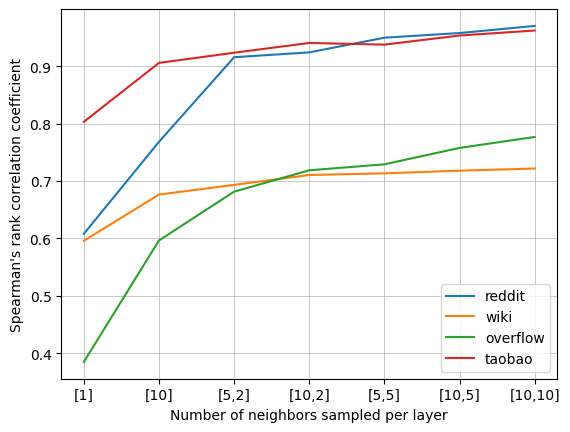

In [4]:
plt.plot(reddit, label="reddit")
plt.plot(wiki, label="wiki")
plt.plot(overflow, label="overflow")
plt.plot(taobao, label="taobao")
plt.xticks([0,1,2,3,4,5,6], sampleSizes)
plt.legend()
#plt.title('Correlation between node out-degree and sampled node frequency rank')
plt.ylabel("Spearman's rank correlation coefficient")
plt.xlabel('Number of neighbors sampled per layer')
plt.grid(linewidth = 0.5)

In [1]:
import json

f = "reddit.json"

with open(f) as json_file:
  data = json.load(json_file)

data

{'10032': 343178,
 '10019': 264424,
 '10072': 253446,
 '10031': 236564,
 '10092': 214868,
 '10054': 206979,
 '10033': 203975,
 '10038': 197714,
 '10015': 185764,
 '10006': 176361,
 '10176': 163917,
 '10016': 155806,
 '10064': 146169,
 '10007': 121689,
 '10053': 120360,
 '10005': 115714,
 '10050': 113125,
 '10052': 110704,
 '10049': 94085,
 '10051': 92158,
 '10211': 89971,
 '10090': 89764,
 '10000': 87931,
 '10076': 81727,
 '10272': 77474,
 '10237': 75742,
 '10056': 75604,
 '10084': 71884,
 '10002': 71070,
 '10024': 69433,
 '10040': 63884,
 '10154': 60383,
 '10055': 60232,
 '10356': 54723,
 '10121': 54572,
 '10009': 53735,
 '10148': 53522,
 '10146': 53511,
 '10195': 52477,
 '10149': 52046,
 '10214': 51395,
 '10210': 51323,
 '10085': 51093,
 '10047': 50517,
 '10114': 50052,
 '10153': 49495,
 '10229': 49486,
 '10044': 48869,
 '10151': 47899,
 '10010': 47815,
 '10196': 47692,
 '10297': 45643,
 '10348': 45268,
 '10152': 45209,
 '10147': 45011,
 '10065': 44518,
 '10008': 44110,
 '10134': 441

In [8]:
import numpy as np
total = sum(data.values())

new_data = {k: v/ total for k,v in data.items()}
new_data

dist_arr = np.zeros(len(new_data))

{'10032': 0.011388451396535326,
 '10019': 0.008774979375360474,
 '10072': 0.008410671583394891,
 '10031': 0.00785043801225598,
 '10092': 0.007130450596106838,
 '10054': 0.006868652074443832,
 '10033': 0.006768963551300763,
 '10038': 0.006561190634057502,
 '10015': 0.006164626768691432,
 '10006': 0.005852585762328491,
 '10176': 0.005439628378176576,
 '10016': 0.00517046272863815,
 '10064': 0.004850656371271387,
 '10007': 0.004038281189333195,
 '10053': 0.003994177977862777,
 '10005': 0.0038399992566501605,
 '10050': 0.0037540826166976285,
 '10052': 0.0036737411005427116,
 '10049': 0.0031222352529679236,
 '10051': 0.0030582872555988514,
 '10211': 0.0029857110904477555,
 '10090': 0.002978841741482837,
 '10000': 0.002918013158619573,
 '10076': 0.002712131801236217,
 '10272': 0.0025709948874787364,
 '10237': 0.0025135180159461816,
 '10056': 0.002508938449969569,
 '10084': 0.0023854892801652362,
 '10002': 0.002358476477955363,
 '10024': 0.0023041522061893168,
 '10040': 0.0021200071945645196,

Text(0.5, 0, 'Node feature ranking')

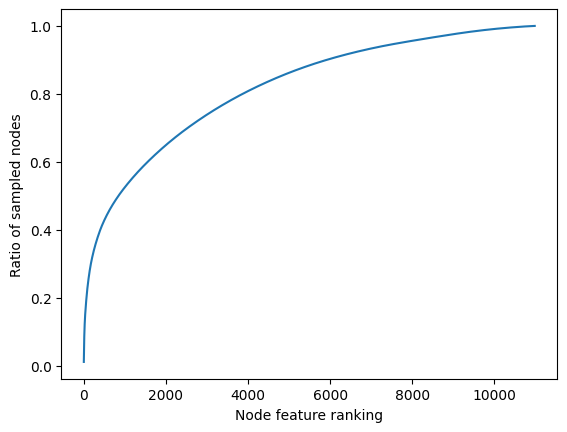

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

cumVals = pd.Series(list(new_data.values())).cumsum()

plt.plot(cumVals)
plt.ylabel("Ratio of sampled nodes")
plt.xlabel('Node feature ranking')

In [3]:
import json
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

datasets = ['wiki', 'reddit', 'taobao', 'overflow']
master_dict = {}

for i in datasets:
  __file__ = os.path.abspath('')
  path = '/mnt/raid0nvme1/zz/cache_data/' + i
  path = './results/' + i
  print(path)

  startName = path + "/meta_" + i + "_subset_100.0Cache_"
  if (i == 'taobao'):
     startName = path + "/meta_" + i + "_subset_3.0Cache_"
  if (i == 'overflow'):
     startName = path + "/meta_" + i + "_subset_5.0Cache_"
  endName = "Size_10_5.json"

  fileNames = [startName + str(20) + "Size_" + i + ".json" for i in ['1', '10', '5_2', '10_2', '5_5', '10_5', '10_10']]
  res = []
  for j in fileNames:
      with open(j) as json_file:
        data = json.load(json_file)
        res.append((data['LRUAccuracy'], data['StaticAccuracy'], data['LFUAccuracy'], data['ARCAccuracy'], data['LFUImpAccuracy']))
  master_dict[i] = res

./results/wiki
./results/reddit
./results/taobao
./results/overflow


Text(0, 0.5, 'Cache hit ratio %')

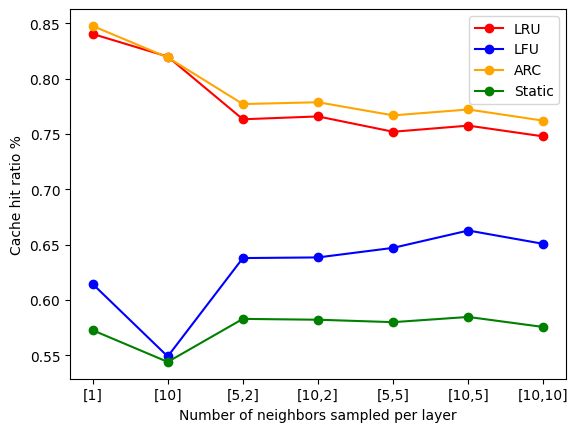

In [10]:
import numpy as np
import matplotlib.pyplot as plt

xs = [2, 5, 10, 20, 40, 60, 80]

# Reddit
reddit_LRUAccuracy = [i[0] for i in master_dict['reddit']]
reddit_LFUAccuracy = [i[2] for i in master_dict['reddit']]
reddit_ARCAccuracy = [i[3] for i in master_dict['reddit']]
reddit_StaticAccuracy = [i[1] for i in master_dict['reddit']]
reddit_LFUImpAccuracy = [i[4] for i in master_dict['reddit']]

# Wiki
wiki_LRUAccuracy = [i[0] for i in master_dict['wiki']]
wiki_LFUAccuracy = [i[2] for i in master_dict['wiki']]
wiki_ARCAccuracy = [i[3] for i in master_dict['wiki']]
wiki_StaticAccuracy = [i[1] for i in master_dict['wiki']]
wiki_LFUImpAccuracy = [i[4] for i in master_dict['wiki']]

# # Taobao
taobao_LRUAccuracy = [i[0] for i in master_dict['taobao']]
taobao_LFUAccuracy = [i[2] for i in master_dict['taobao']]
taobao_ARCAccuracy = [i[3] for i in master_dict['taobao']]
taobao_StaticAccuracy = [i[1] for i in master_dict['taobao']]
taobao_LFUImpAccuracy = [i[4] for i in master_dict['taobao']]

# Overflow
LRUAccuracy = [i[0] for i in master_dict['overflow']]
LFUAccuracy = [i[2] for i in master_dict['overflow']]
ARCAccuracy = [i[3] for i in master_dict['overflow']]
StaticAccuracy = [i[1] for i in master_dict['overflow']]
LFUImpAccuracy = [i[4] for i in master_dict['overflow']]


plt.plot(wiki_LRUAccuracy, 'o-', color='red', label="LRU")
plt.plot(wiki_LFUAccuracy, 'o-', color='blue', label="LFU")
plt.plot(wiki_ARCAccuracy, 'o-', color='orange', label="ARC")
plt.plot(wiki_StaticAccuracy, 'o-', color='green', label="Static")
#plt.plot(wiki_LFUImpAccuracy, 'o-', color='purple', label="LFU Improved")
sampleSizes = ['[1]', '[10]', '[5,2]', '[10,2]','[5,5]', '[10,5]', '[10,10]']
plt.xticks([0,1,2,3,4,5,6], sampleSizes)
plt.legend()
#plt.title("Wikipedia")
plt.xlabel('Number of neighbors sampled per layer')
plt.ylabel('Cache hit ratio %')

Text(0, 0.5, 'Cache hit ratio %')

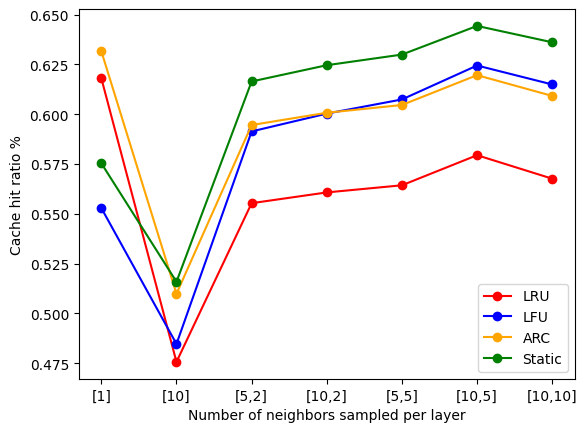

In [11]:
plt.plot(reddit_LRUAccuracy, 'o-', color='red', label="LRU")
plt.plot(reddit_LFUAccuracy, 'o-', color='blue', label="LFU")
plt.plot(reddit_ARCAccuracy, 'o-', color='orange', label="ARC")
plt.plot(reddit_StaticAccuracy, 'o-', color='green', label="Static")
#plt.plot(reddit_LFUImpAccuracy, 'o-', color='purple', label="LFU Improved")
plt.legend()
sampleSizes = ['[1]', '[10]', '[5,2]', '[10,2]','[5,5]', '[10,5]', '[10,10]']
plt.xticks([0,1,2,3,4,5,6], sampleSizes)
plt.xlabel('Number of neighbors sampled per layer')
plt.ylabel('Cache hit ratio %')

Text(0, 0.5, 'Cache hit ratio %')

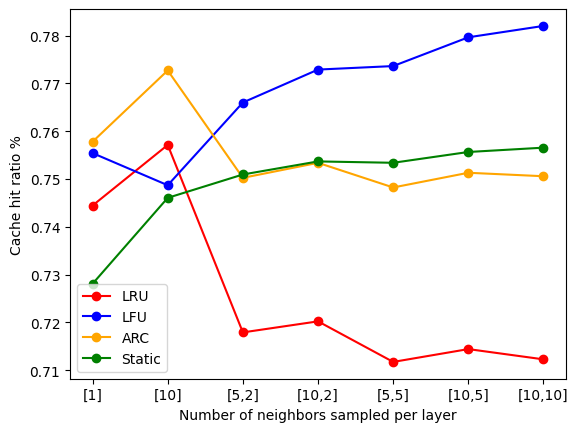

In [12]:
plt.plot(taobao_LRUAccuracy, 'o-', color='red', label="LRU")
plt.plot(taobao_LFUAccuracy, 'o-', color='blue', label="LFU")
plt.plot(taobao_ARCAccuracy, 'o-', color='orange', label="ARC")
plt.plot(taobao_StaticAccuracy, 'o-', color='green', label="Static")
#plt.plot(taobao_LFUImpAccuracy, 'o-', color='purple', label="LFU Improved")
plt.legend()
sampleSizes = ['[1]', '[10]', '[5,2]', '[10,2]','[5,5]', '[10,5]', '[10,10]']
plt.xticks([0,1,2,3,4,5,6], sampleSizes)
plt.xlabel('Number of neighbors sampled per layer')
plt.ylabel('Cache hit ratio %')

Text(0, 0.5, 'Cache hit ratio %')

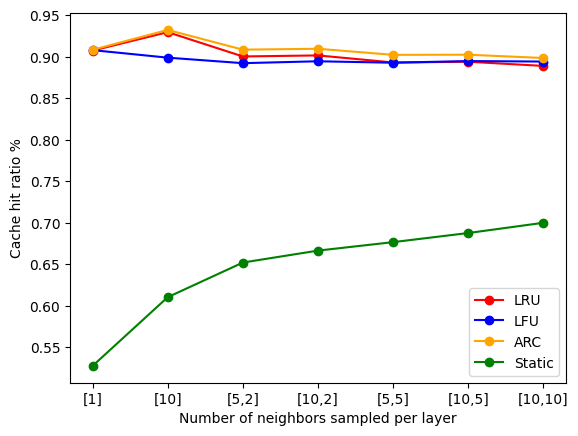

In [13]:
plt.plot(LRUAccuracy, 'o-', color='red', label="LRU")
plt.plot(LFUAccuracy, 'o-', color='blue', label="LFU")
plt.plot(ARCAccuracy, 'o-', color='orange', label="ARC")
plt.plot(StaticAccuracy, 'o-', color='green', label="Static")
#plt.plot(LFUImpAccuracy, 'o-', color='purple', label="LFU Improved")
plt.legend()
sampleSizes = ['[1]', '[10]', '[5,2]', '[10,2]','[5,5]', '[10,5]', '[10,10]']
plt.xticks([0,1,2,3,4,5,6], sampleSizes)
plt.xlabel('Number of neighbors sampled per layer')
plt.ylabel('Cache hit ratio %')